<a href="https://colab.research.google.com/github/arutraj/.githubcl/blob/main/StationarityADFKPSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
#df_new=pd.read_csv("/content/drive/MyDrive/sample_assets/TimeSeries1/GlobalLandTemperaturesByMajorCity.csv")
df_new=pd.read_csv("/content/drive/MyDrive/GlobalLandTemperaturesByMajorCity.csv")

In [ ]:
df_new.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [5]:
df_utils_new=df_new[['dt','AverageTemperature']]
df_utils_new= df_utils_new.dropna()
df_utils_new[:8]

,dt,AverageTemperature
0,1849-01-01,26.704
1,1849-02-01,27.434
2,1849-03-01,28.101
3,1849-04-01,26.140
4,1849-05-01,25.427
5,1849-06-01,24.844
6,1849-07-01,24.058
7,1849-08-01,23.576


Time Plot

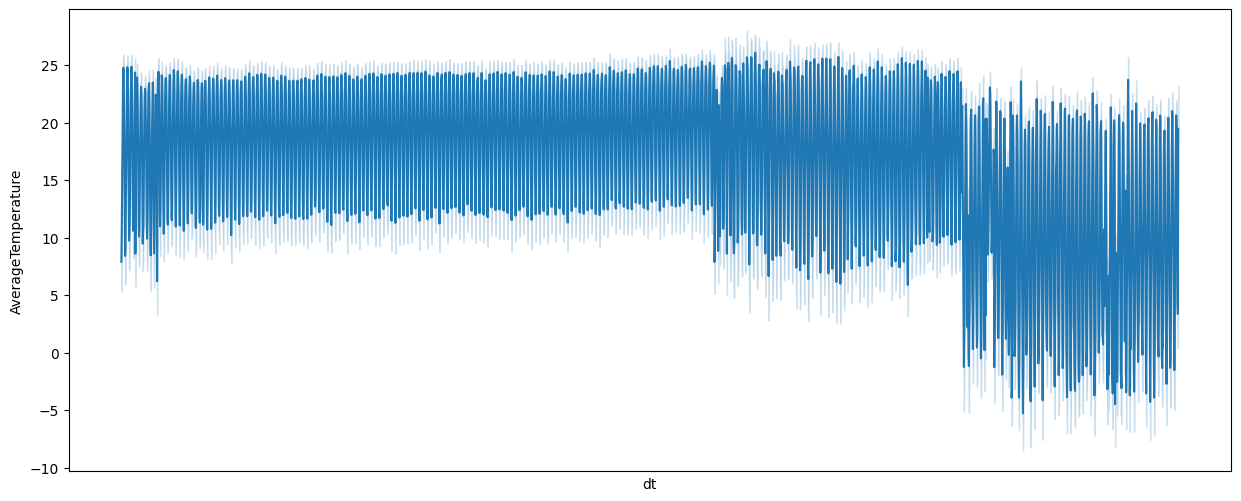

In [6]:
# TIME PLOT
fig=plt.figure(figsize=(15,6))
sns.lineplot(data=df_utils_new,x='dt',y='AverageTemperature')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.show()

ADF Test

In [7]:
# ADF test
# Augmented Dickey Fuller Test — ADF — tests the null hypothesis that a unit root is present in a time series sample.
# It is an augmented version of the Dickey–Fuller test for a larger and more complicated set of time series models, compared to simple ADF Test can handle more complex data.
result=adfuller (df_utils_new['AverageTemperature'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -6.346503
p-value: 0.000000
Critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


As the test statistic is greater (less negative) then the critical value becomes the reason to not reject the null hypothesis. This indicates that the data is non-stationary.

KPSS Test

In [8]:
# KPSS Test
# Kwiatkowski-Phillips-Schmidt-Shin — KPSS — Unit root test that tests for the stationarity of a given series around a deterministic trend.
result_kpss_ct=kpss(df_utils_new['AverageTemperature'],regression="ct")
print('Test Statistic: %f' %result_kpss_ct[0])
print('p-value: %f' %result_kpss_ct[1])
print('Critical values:')
for key, value in result_kpss_ct[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.369631
p-value: 0.010000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


As the test statistics value is greater than the critical value, the null hypothesis is rejected. This indicates that the data is non-stationary.

## Transforming the Data and Checking Stationary

In [9]:
df_log=np.sqrt(df_utils_new['AverageTemperature'])
df_diff=df_log.diff().dropna()

result=adfuller (df_diff)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -44.097779
p-value: 0.000000
Critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


As the ADF test statics is lesser (more negative) then the critical value becomes the reason to reject the null hypothesis. This indicates that the data is stationary.

In [10]:
result_kpss_ct_log=kpss(df_diff,regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.230000
p-value: 0.010000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


As the KPSS test statistics value is less than the critical value, the null hypothesis is not rejected. This indicates that the data is stationary.



## Comparing the before and after time series

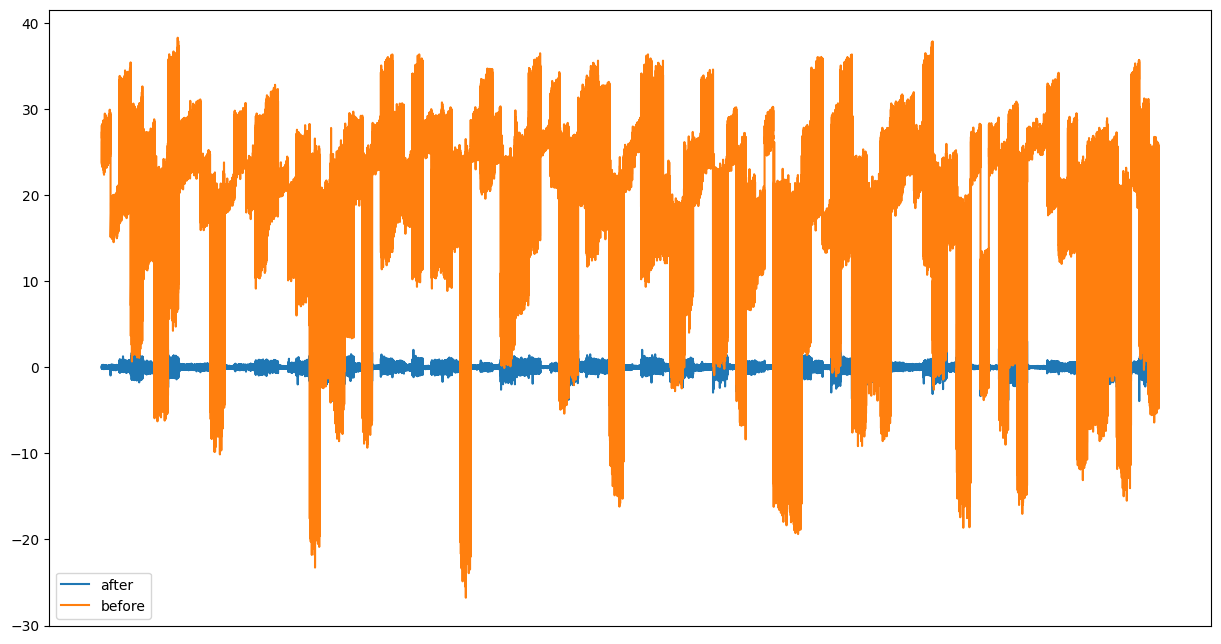

In [11]:
plt.figure(figsize=(15,8))
plt.plot(df_diff,label="after")
plt.plot(df_utils_new['AverageTemperature'],label="before")
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.legend()
plt.show()